# Deep learning based time series classification in aeon

There are a range of deep learning based classification algorithms in the toolkit.
The networks that are common to classification, regression and clustering are in the
`networks` module. Our deep learning classifiers are based those used in deep
learning bake off [1] and recent experimentation [2]. [3] provides an extensive recent
review of related deep learning work.


The use case for deep learning classifiers is identical to that of all classifiers.
However, you need to have tensorflow installed in your
environment. If you have a GPU correctly installed the classifiers should use them,
although it is worth checking the output.


In [3]:
from sklearn.metrics import accuracy_score

from aeon.classification.deep_learning import TimeCNNClassifier
from aeon.datasets import load_basic_motions  # multivariate dataset
from aeon.datasets import load_italy_power_demand  # univariate dataset

italy, italy_labels = load_italy_power_demand(split="train")
italy_test, italy_test_labels = load_italy_power_demand(split="test")
motions, motions_labels = load_basic_motions(split="train")
motions_test, motions_test_labels = load_basic_motions(split="train")
cnn = TimeCNNClassifier(n_epochs=10)
cnn.fit(italy, italy_labels)
y_pred = cnn.predict(italy_test)
accuracy_score(italy_test_labels, y_pred)

65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


0.5014577259475219

### Classifier Details

The deep learning bake off [1] found that the Residual Network (ResNet) was the best
performing architecture for TSC. ResNet has the following network structure.


<img src="./img/resnet.png" width="600" alt="ROCKET.">

The Inception Time deep learning algorithm was proposed subsequent to [1].
``InceptionTimeClassifier`` is an ensemble of five ``IndividualInceptionClassifier``
deep learning classifiers. Each base classifier shares the same architecture based on
Inception modules. Diversity is achieved through randomly initialising weights.
A ``IndividualInceptionClassifier`` has the following structure.

<img src="./img/inception_module.png" width="600" alt="ROCKET.">

An ``IndividualInceptionClassifier`` is structured as follows.

<img src="./img/inception.png" width="600" alt="ROCKET.">

The ``BaseDeepClassifier`` serves as an abstract foundation for deep learning-based time series classifiers. It provides default implementations for prediction methods and requires defining a custom model-building process. Supporting multivariate inputs and leveraging TensorFlow, it includes key parameters like batch size, random state, and output file names, emphasizing flexibility and extensibility for deep learning tasks.

The ``TimeCNNClassifier`` is a deep learning model designed for time-series classification using convolutional neural networks (CNN), as described in [5]. It consists of multiple convolution layers with customizable kernel sizes, number of filters, activation functions, and pooling layers. The model supports various configurations for padding, strides, and dilation rates.  The model's adaptability allows it to handle noise and achieve superior classification accuracy. Customizable parameters include kernel sizes, activation functions, and pooling layers, supporting versatile applications across various domains.
The CNN architecture for three-variate time series classification is structured follows.

<img src="./img/TimeCNNClassifier.png" width="600" alt="ROCKET">

The ``FCNClassifier`` differs from the ``TimeCNNClassifier`` primarily in its deeper architecture with three convolutional layers, larger default filters, and kernel sizes designed for time-series feature extraction [5]. While both utilize convolutional operations, FCN focuses on categorical cross-entropy loss, whereas TimeCNN emphasizes mean-squared-error loss, making FCN more suited for classification tasks.

The ``DisjointCNNClassifier`` is a deep learning model designed for time-series classification using a unique 1+1D convolutional architecture [6]. It features four convolutional layers, customizable filter sizes, ELU activations, and a max-pooling layer. The model integrates fully connected layers and optimizes using categorical cross-entropy loss, focusing on flexibility and accuracy for diverse time-series datasets.
The overall architecture of the disjointCNN model and 1+1D block is as follows.

<img src="./img/DisjointCNN.png" width="600" alt="ROCKET">

The ``LITETimeClassifier`` is an ensemble classifier combining multiple ``IndividualLITETimeClassifier`` models to handle univariate and multivariate time-series data [7]. It uses configurable layers, kernels, and activations, supporting LITE or LITEMV variants for diverse tasks. Key features include categorical cross-entropy loss, adjustable filters, and extensive model-saving options for flexibility and robustness in time-series classification.
The LITE architecture is as follows.

<img src="./img/LITE architecture.png" width="600" alt="ROCKET">

HInception is a hierarchical variant of Inception modules, designed to process multi-scale data with an emphasis on capturing hierarchical relationships in time-series datasets [8].

The ``EncoderClassifier`` is a neural network model tailored for time-series classification. It features 1D convolution layers with customizable kernel sizes, filters, and padding [9]. Incorporating max pooling, dropout, and a fully connected layer, it uses sigmoid activation and categorical cross-entropy loss. Designed for flexibility, it supports various optimizers, callbacks, and saving mechanisms, offering robust performance for diverse datasets.
The architecture diagram of the encoder(top) and the convolutional block(bottom left) is as follows.

<img src="./img/EncoderClassifier.png" width="600" alt="ROCKET">


## Performance on the UCR univariate datasets
You can find the dictionary based classifiers as follows. Please note we have not
fully evaluated all the deep learners yet, they take a long time to run.

In [2]:
from aeon.utils.discovery import all_estimators

est = all_estimators("classifier", tag_filter={"algorithm_type": "deeplearning"})
for c in est:
    print(c)

/home/afawaz/phd/venvs/aeon-dev-py39/lib/python3.9/site-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.
  warnings.warn(problem)


('DisjointCNNClassifier', <class 'aeon.classification.deep_learning._disjoint_cnn.DisjointCNNClassifier'>)
('EncoderClassifier', <class 'aeon.classification.deep_learning._encoder.EncoderClassifier'>)
('FCNClassifier', <class 'aeon.classification.deep_learning._fcn.FCNClassifier'>)
('InceptionTimeClassifier', <class 'aeon.classification.deep_learning._inception_time.InceptionTimeClassifier'>)
('IndividualInceptionClassifier', <class 'aeon.classification.deep_learning._inception_time.IndividualInceptionClassifier'>)
('IndividualLITEClassifier', <class 'aeon.classification.deep_learning._lite_time.IndividualLITEClassifier'>)
('LITETimeClassifier', <class 'aeon.classification.deep_learning._lite_time.LITETimeClassifier'>)
('MLPClassifier', <class 'aeon.classification.deep_learning._mlp.MLPClassifier'>)
('ResNetClassifier', <class 'aeon.classification.deep_learning._resnet.ResNetClassifier'>)
('TimeCNNClassifier', <class 'aeon.classification.deep_learning._cnn.TimeCNNClassifier'>)


In [8]:
from aeon.benchmarking.results_loaders import get_estimator_results_as_array
from aeon.datasets.tsc_datasets import univariate

names = [t[0].replace("Classifier", "") for t in est]
# Not done these yet
names.remove("Encoder")
names.remove("FCN")
names.remove("IndividualInception")
names.remove("IndividualLITE")
names.remove("MLP")
names.remove("TimeCNN")
names.remove("DisjointCNN")  # Multivariate only
names.append("CNN")  # using old name


results, present_names = get_estimator_results_as_array(
    names, univariate, include_missing=False
)
results.shape

(112, 4)

(<Figure size 600x230 with 1 Axes>, <Axes: >)

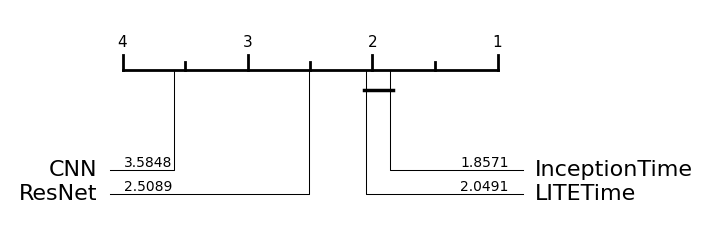

In [9]:
from aeon.visualisation import plot_boxplot, plot_critical_difference

plot_critical_difference(results, names)

(<Figure size 1000x600 with 1 Axes>, <Axes: >)

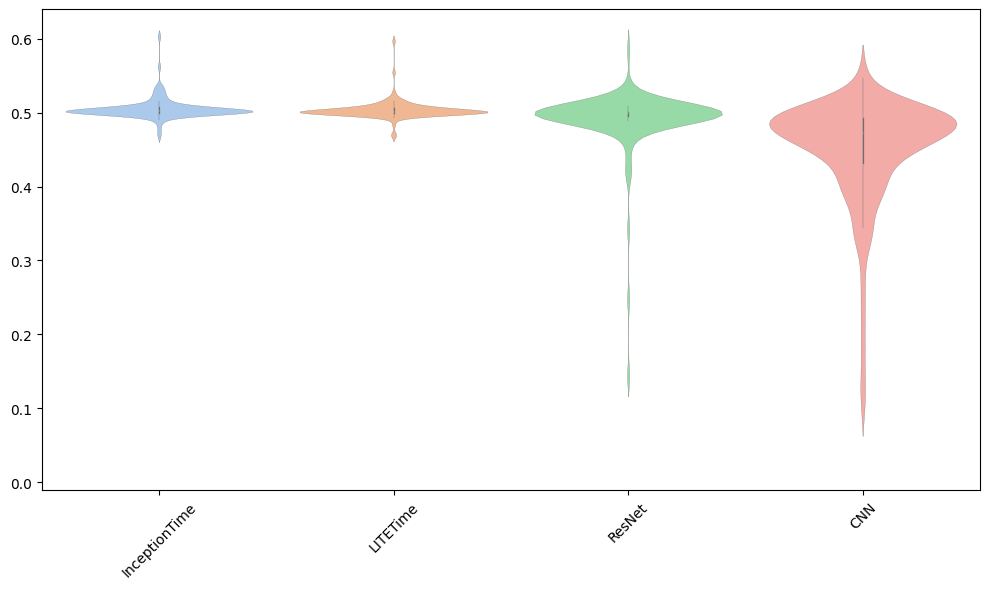

In [11]:
plot_boxplot(results, names, relative=True)

## References

[1] Fawaz et al. (2019) "Deep learning for time series classification: a review" Data
 Mining and Knowledge Discovery. 33(4): 917-963

[2] Fawaz et al. (2020) "InceptionTime: finding AlexNet for time series classification.
Data Mining and Knowledge Discovery. 34(6): 1936-1962

[3] Foumani et al. (2023) "Deep Learning for Time Series Classification and Extrinsic
Regression: A Current Survey" ArXiv https://arxiv.org/pdf/2302.02515.pdf

[4]  https://github.com/MSD-IRIMAS/CF-4-TSC

[5] Zhao et. al, Convolutional neural networks for time series classification,
    Journal of Systems Engineering and Electronics, 28(1):2017

[6] Foumani, Seyed Navid Mohammadi, Chang Wei Tan, and Mahsa Salehi.
    "Disjoint-cnn for multivariate time series classification

[7] Ismail-Fawaz et al. LITE: Light Inception with boosTing
    tEchniques for Time Series Classification, IEEE International
    Conference on Data Science and Advanced Analytics, 2023

[8] Mancuso, P., Piccialli, V. and Sudoso, A.M., 2021. A machine learning approach for forecasting hierarchical time series. Expert Systems with Applications, 182, p.115102.

[9] Serrà et al. Towards a Universal Neural Network Encoder for Time Series In proceedings International Conference of the Catalan Association for Artificial Intelligence, 120--129 2018